## 3.2.1 Generating dataset

In [1]:
import torch
from torch.autograd import Variable
import random
from IPython import display
from matplotlib import pyplot as plt
%matplotlib inline
display.set_matplotlib_formats('svg')


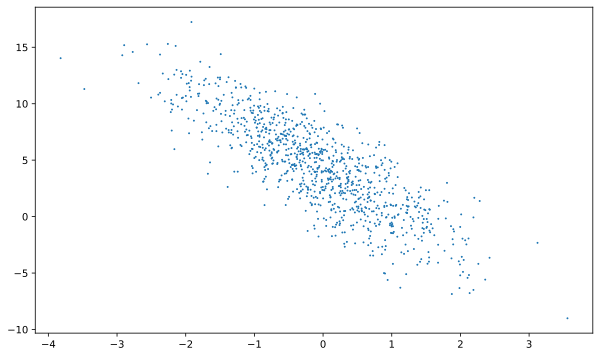

In [2]:
x = torch.randn([1000, 2])
w = torch.tensor([2,-3.4]).reshape(2,1)
b = torch.tensor(4.2)
epsilon = torch.randn(1000).reshape(-1, 1)
y = torch.mm(x, w) + b + epsilon
# (torch.mm(X, w) + b).shape, epsilon.shape, y.shape
plt.figure(figsize=(10,6))
plt.scatter(x[:,1], y, 1)
plt.show()

## 3.2.2 Reading the dataset


yield 是一个类似 return 的关键字，迭代一次遇到yield时就返回yield后面(右边)的值。重点是：下一次迭代时，从上一次迭代遇到的yield后面的代码(下一行)开始执行。
简要理解：yield就是 return 返回一个值，并且记住这个返回的位置，下次迭代就从这个位置后(下一行)开始。


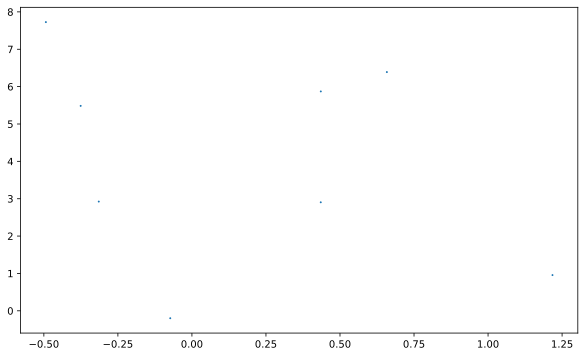

In [3]:
def get_minibatch(x, y, batch_size=8):
    idxs = torch.randperm(x.size(0))
#     print(idxs)
#     shuffle_x = x[idxs]
#     shuffle_y = y[idxs]
#     return 
#     print(shuffle_x)
    for i in range(0, len(idxs), batch_size):
        j = idxs[i: min(i + batch_size, len(idxs))]
        yield x[j], y[j]
    
for x_batch, y_batch in get_minibatch(x, y):
    plt.figure(figsize=(10,6))
    plt.scatter(x_batch[:,1], y_batch, 1)
    plt.show()
    break

## 3.2.3 Initializing Model Params

In [4]:
w_prob = Variable(torch.zeros(2, 1).normal_(std=0.01), requires_grad=True)
b_prob = Variable(torch.zeros(1), requires_grad=True)
w_prob, b_prob

(tensor([[0.0004],
         [0.0079]], requires_grad=True),
 tensor([0.], requires_grad=True))

## 3.2.4/5 Define the model & Loss func

In [5]:
def f(x, w_prob, b_prob):
    return torch.mm(x, w_prob) + b_prob

def loss_func(prob, y):
    return (prob - y.reshape(prob.shape)) ** 2 / 2

## 3.2.6 Define the Optimization Algorithm

In [6]:
def minibatch_SGD(lr, params, bs):
    for param in params:
        param.data.sub_(lr*param.grad / bs)
        param.grad.data.zero_()

## 3.2.7 Training

In [11]:
def training(x, y, w_prob, b_prob):
    bs = 8
    lr = 0.01
    epoch = 5
    for i in range(epoch):
        for x_iter, y_iter in get_minibatch(x, y, bs):
            prob = f(x, w_prob, b_prob)
            loss = loss_func(prob, y)
            loss.mean().backward()
            minibatch_SGD(lr, [w_prob, b_prob], bs)
        if (i+1) % 1 == 0:
            epoch_loss = loss_func(f(x, w_prob, b_prob), y)
            print(f'epoch {i+1}: train loss: {epoch_loss.mean()}')
        
training(x, y , w_prob, b_prob)


epoch 1: train loss: 0.5164554715156555
epoch 2: train loss: 0.5164554715156555
epoch 3: train loss: 0.5164554715156555
epoch 4: train loss: 0.5164554715156555
epoch 5: train loss: 0.5164554715156555


In [12]:
def evaluate(params_prob, params):
    w_prob, b_prob = params_prob
    w, b = params
    print(f'estimate param: {w_prob.squeeze(), b_prob}')
    print(f'true param: {w.squeeze(), b}')
    print(f'weight error: {w_prob - w}')
    print(f'bias error: {b_prob - b}')
    
evaluate([w_prob, b_prob], [w, b])

estimate param: (tensor([ 2.0198, -3.3956], grad_fn=<SqueezeBackward0>), tensor([4.1877], requires_grad=True))
true param: (tensor([ 2.0000, -3.4000]), tensor(4.2000))
weight error: tensor([[0.0198],
        [0.0044]], grad_fn=<SubBackward0>)
bias error: tensor([-0.0123], grad_fn=<SubBackward0>)


## Visualization

/Users/Alchemist/opt/anaconda3/envs/d2l/lib/python3.7/site-packages/mpl_toolkits/mplot3d/proj3d.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array([xs, ys, zs, np.ones_like(xs)])


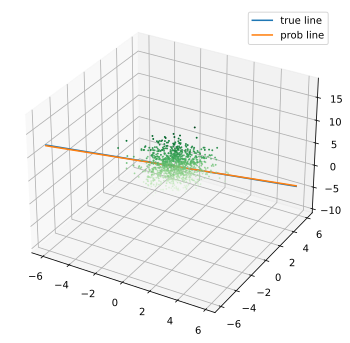

In [30]:
# import pdb
x_line = torch.arange(-6, 6, 0.1).reshape(-1, 2)
# print(x.shape)
true_line = torch.mm(x_line, w) + b
prob_line = torch.mm(x_line, w_prob) + b_prob
# pdb.set_trace()
y_dot = torch.mm(x, w) + b + epsilon
# (torch.mm(X, w) + b).shape, epsilon.shape, y.shape

plt.figure(figsize=(10,6))
ax = plt.axes(projection='3d')
# print(x_line[:,0].squeeze().shape, x_line[:,1].squeeze().shape, true_line.shape)
ax.plot3D(x_line[:,0].squeeze(), x_line[:,1].squeeze(), true_line.squeeze(), label='true line')
ax.plot3D(x_line[:,0].squeeze(), x_line[:,1].squeeze(), prob_line.detach().numpy().squeeze(), label='prob line')
ax.scatter3D(x[:,0], x[:,1], y_dot, c=y_dot, cmap='Greens', s=1)

# plt.plot(x_line[:,1], true_line, label='true line')
# plt.plot(x_line[:,1], prob_line.detach().numpy(), label='prob line')

# plt.scatter(x[:,1], y_dot, 1)

plt.legend()
plt.show()

## Exercise

In [34]:
def square_loss(prob, y):
    return (prob - y.reshape(prob.shape)) ** 2 // 2

# broadcast
def fake_loss(prob, y):
    return (prob - y) ** 2 // 2

prob = torch.arange(6).reshape(-1,1)
y = torch.arange(6)
square_loss(prob, y), fake_loss(prob, y)

(tensor([[0],
         [0],
         [0],
         [0],
         [0],
         [0]]),
 tensor([[ 0,  0,  2,  4,  8, 12],
         [ 0,  0,  0,  2,  4,  8],
         [ 2,  0,  0,  0,  2,  4],
         [ 4,  2,  0,  0,  0,  2],
         [ 8,  4,  2,  0,  0,  0],
         [12,  8,  4,  2,  0,  0]]))